# Megaline Mobile Carrier Machine Learning Model <a id='back'></a>

## Table of Contents

- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Files and Libraries](#importing-files-and-libraries)
- [Pre-processing Data](#pre-processing-data)
- [Model Accuracy Training and Validation Set Analysis](#model-accuracy-training-and-validation-set-analysis)
    - [Decision Tree Model](#decision-tree-model)
    - [Random Forest Model](#random-forest-model)
    - [Logistic Regression Model](#logistic-regression-model)
    - [Model Comparison using Test Set](#model-comparison-using-test-set)
- [Sanity Check](#sanity-check)
- [Conclusion](#conclusion)

### Project Introduction

- Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. 

- You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan.

- The project goal is to develop a model with the highest possible accuracy for our client Megaline a popular mobile carrier. For this project, our client is expecting an accuracy threshold of at least 0.75.

### Analysis Outline

- Split the source data into a training set, a validation set, and a test set.

- Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

- Check the quality of the model using the test set.

- Sanity check the model.

### Results

• Used pandas, sklearn, and matplotlib libraries to create machine learning models

• Split the sample data into a training set, a validation set, and a test set

• Investigated the quality of different models by changing hyperparameters of each model

• Checked the quality of the model using the test set

• Sanity checked each model type

[Back to Table of Contents](#back)

## Importing Files and Libraries

In [26]:
# Importing libraries that will be used for this analysis
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
# Importing csv file
try:
    users_behavior = pd.read_csv('users_behavior.csv', sep=',')
except:
    users_behavior = pd.read_csv('/datasets/users_behavior.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-processing Data

In [3]:
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
# Checking for snakecase format in header
users_behavior.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

In [5]:
# Looking for duplicates
users_behavior.duplicated().sum()

0

In [6]:
# Looking for null values
users_behavior.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
# Splitting our data into a training set, a testing set, and a validation set for our machine learning model set at a 3:1:1 ratio using the train_test_split function. 
ub_train_valid, ub_test = train_test_split(users_behavior, test_size=0.20, random_state=12345)
ub_train, ub_valid = train_test_split(ub_train_valid, test_size=0.25, random_state=12345)
print(ub_train.shape)
print(ub_valid.shape)
print(ub_test.shape)

(1928, 5)
(643, 5)
(643, 5)


In [8]:
ub_train['is_ultra'].value_counts()

0    1339
1     589
Name: is_ultra, dtype: int64

Our training set has 60% of the total data (1928/3214) and each of the validation set and test set will have 20% of the total data (643/3214)

In [9]:
# Separating our target columns from the feature columns of each analysis groups
features_train = ub_train.drop(['is_ultra'], axis=1)
target_train = ub_train['is_ultra']

features_valid = ub_valid.drop(['is_ultra'], axis=1)
target_valid = ub_valid['is_ultra']

features_test = ub_test.drop(['is_ultra'], axis=1)
target_test = ub_test['is_ultra']

[Back to Table of Contents](#back)

## Model Accuracy Training and Validation Set Analysis

### Decision Tree Model

In [10]:
# Creating a function that can calculate the accuracy score for a decision tree based on its max_depth parameter
def dectree (depth):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predictions_valid = tree_model.predict(features_valid)
    return accuracy_score(target_valid, predictions_valid)

In [28]:
# Using the new fuction to create a dataframe to later create a graphic on the accuracy score of every variation
dt = pd.DataFrame({1: [dectree(1)],
                   2: [dectree(2)],
                   3: [dectree(3)],
                   4: [dectree(4)],
                   5: [dectree(5)]})
print(dt)

          1         2         3         4         5
0  0.738725  0.757387  0.765163  0.763608  0.758942


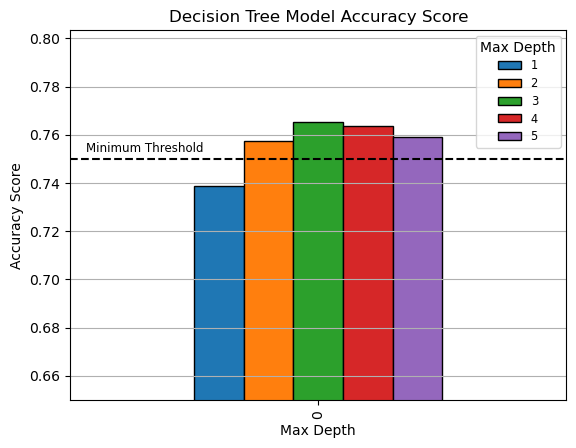

In [12]:
# Plotting the decision tree model scores
dt.plot(kind='bar',
        title='Decision Tree Model Accuracy Score',
        ylim=0.65,
        xlabel='Max Depth',
        ylabel='Accuracy Score',
        edgecolor='black')
plt.axhline(y=0.75,
            color='black',
            linestyle='--')
plt.text(-0.35, 0.753,
         'Minimum Threshold',
         wrap=True,
         horizontalalignment='center',
         fontsize=8.5)
plt.legend(title='Max Depth',
           fontsize=8.25,
           loc='upper right')
plt.grid(axis='y')
plt.show()

Based the decision tree model, it shows that max_depth of 3 would yield the highest accuacy score that also met the 0.75 threshold. At a max_depth less than 3 the data would be underfitted and over 3 would be overfitted.

[Back to Table of Contents](#back)

### Random Forest Model

In [13]:
# For the random forest model we will change the max_depth value to the n_estimators value to find the highest accuracy score for this model
def ranforest (est):
    rforest_model = RandomForestClassifier(random_state=12345, n_estimators=est)
    rforest_model.fit(features_train, target_train)
    score = rforest_model.score(features_valid, target_valid)
    return score

In [27]:
# Creating a dataframe to chart the scores from the random forest model
rf = pd.DataFrame({1: [ranforest(1)],
                   2: [ranforest(2)],
                   3: [ranforest(3)],
                   4: [ranforest(4)],
                   5: [ranforest(5)],
                   6: [ranforest(6)],
                   7: [ranforest(7)],
                   8: [ranforest(8)],
                   9: [ranforest(9)],
                   10: [ranforest(10)],
                   11: [ranforest(11)],
                   12: [ranforest(12)],
                   13: [ranforest(13)],
                   14: [ranforest(14)],
                   15: [ranforest(15)]})
print(rf)

         1         2         3         4         5         6         7   \
0  0.702955  0.757387  0.744946  0.765163  0.762053  0.769829  0.771384   

         8         9         10        11        12        13        14  \
0  0.786936  0.783826  0.788491  0.780715  0.782271  0.777605  0.785381   

         15  
0  0.783826  


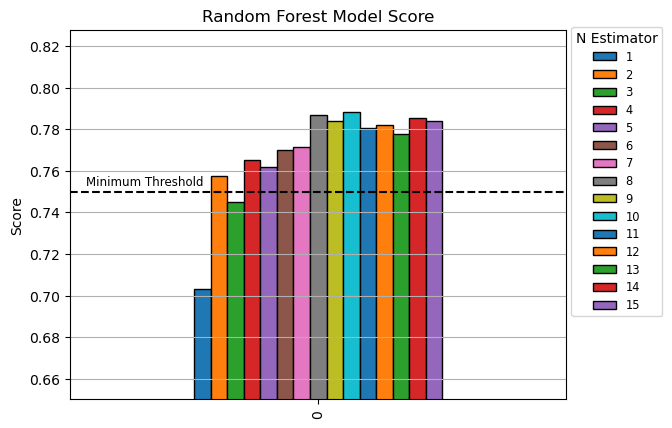

In [15]:
# Plotting random forest model scores
rf.plot(kind='bar',
        title='Random Forest Model Score',
        ylim=0.65,
        ylabel='Score',
        edgecolor='black')
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.35, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='N Estimator',
           fontsize="8.25",
           loc=(1.01, 0.225))
plt.grid(axis='y')
plt.show()

Based the random forest model, it shows the highest score so far and the best n_estimator value would be 10. Any value under 10 would be noticably underfitting and values over 10 would be overfitting.

[Back to Table of Contents](#back)

### Logistic Regression Model

In [16]:
# Creating a function to calculate the accuracy score using LogisticRegression
logr_model = LogisticRegression(random_state=12345, solver='liblinear')
logr_model.fit(features_train, target_train) 
score_train = logr_model.score(features_train, target_train) 
score_valid = logr_model.score(features_valid, target_valid)

In [17]:
# Creating a dataframe to chart our results from the logistic regression model
lr = pd.DataFrame({'training_score': [score_train],
                   'valid_score': [score_valid]})

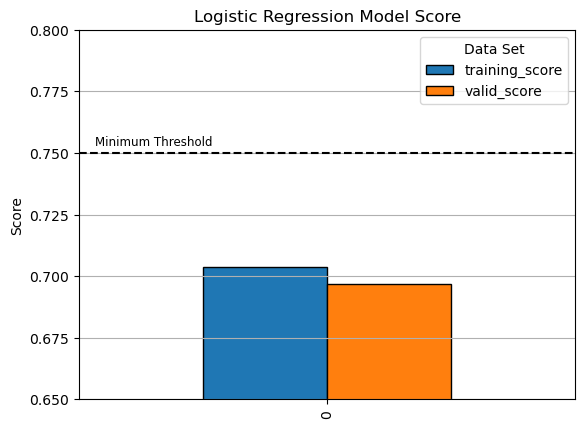

In [18]:
# Plotting logistic regression model
lr.plot(kind='bar',
        title='Logistic Regression Model Score',
        ylim=0.65,
        ylabel='Score',
        edgecolor='black')
plt.yticks([0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8])
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.35, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='Data Set',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Based on the training and validation sets, the logistic regression model showed the lowest accuracy values when compared to the previous models. The logistic regression model did not reach the threshold of 0.75 accuracy in either the training set or the validation set.

[Back to Table of Contents](#back)

### Model Comparison using Test Set

In [19]:
# Now we use the same models as before except now we use the test dataset instead of the valid dataset
dtree_model = DecisionTreeClassifier(random_state=12345, max_depth=3)
dtree_model.fit(features_train, target_train)
predictions_test = dtree_model.predict(features_test)
dt_score = accuracy_score(target_test, predictions_test)
print('Decision Tree Model Accuracy Score =', dt_score.round(3))

Decision Tree Model Accuracy Score = 0.787


In [ ]:
# Using the test dataset instead of the valid dataset
rforest_model = RandomForestClassifier(random_state=12345, n_estimators=10)
rforest_model.fit(features_train, target_train)
rf_score = rforest_model.score(features_test, target_test)
print('Random Forest Model Accuracy Score =', rf_score.round(3))

Random Forest Model Accuracy Score = 0.792


In [21]:
# Using the test dataset instead of the valid dataset
score_test = logr_model.score(features_test, target_test)
print('Logistic Regression Model Accuracy Score =', score_test.round(3))

Logistic Regression Model Accuracy Score = 0.701


In [22]:
# Creating a dataframe with all the model test set results
model_compare = pd.DataFrame({'Decision Tree': [dt_score],
                              'Random Forest': [rf_score],
                              'Logistic Regression': [score_test]})

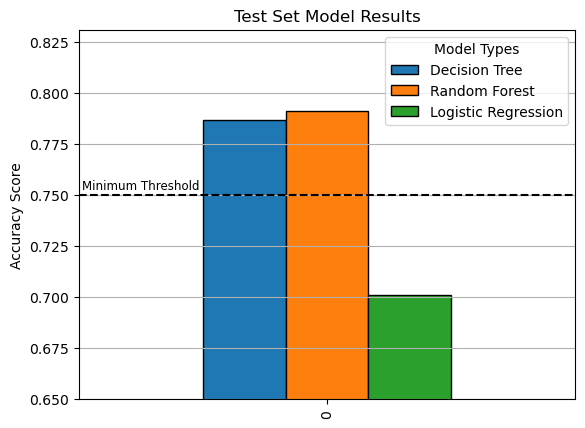

In [ ]:
# Plotting the model test data
model_compare.plot(kind='bar',
        title='Test Set Model Results',
        ylim=0.65,
        ylabel='Accuracy Score',
        edgecolor='black')
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.375, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='Model Types',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Based on the test data sets, the random forest model did the best with an accuracy score higher than the 0.75 threshold. The logistic regression model did very poorly compared to the others with an accuracy score well below the 0.75 threshold.

[Back to Table of Contents](#back)

## Sanity Check

In [24]:
# Executing sanity check
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(features_train, target_train)
dummy_score = dummy_clf.score(features_test, target_test)
print(dummy_score.round(3))

0.695


In [25]:
# Executing sanity check 
try:
  assert rf_score > dummy_score
  print('Sanity Check Passed')
except:
  print('Sanity Check Failed')

Sanity Check Passed


Our dummy model outputed a value of 0.69 and shows that this is a baseline of what the minimum accuracy score should be.

[Back to Table of Contents](#back)

## Conclusion

 In conclusion, the model we have built with the highest accuracy would be the random forest model. From the dummy model, it shows us that the minimum accuracy score we should expect is 0.69. However, the random forest model had a 0.79 accuracy score well above the dummy score of 0.69 and the client expected a minimum score of 0.75. This is to be expected as the random forest model usually has the highest accuracy score when compared to the other model types.

[Back to Table of Contents](#back)